In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#

In [2]:
data = pd.read_csv('/content/drive/MyDrive/data/ageandheight.csv')


In [3]:
data

,Unnamed: 0,Age,Height
0,0,14.767874,59.627484
1,1,3.107671,36.146453
2,2,7.266917,46.912878
3,3,1.815180,29.125660
4,4,16.753758,68.170414
...,...,...,...
95,95,7.323712,46.857505
96,96,5.591509,39.339990
97,97,2.625606,32.918925
98,98,5.519293,40.704154


# New Section

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   Age         100 non-null    float64
 2   Height      100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [5]:
data.describe()

,Unnamed: 0,Age,Height
count,100.000000,100.000000,100.000000
mean,49.500000,7.966138,45.955674
std,29.011492,5.321621,10.787318
min,0.000000,-0.780853,27.332513
25%,24.750000,3.048885,36.320107
50%,49.500000,7.795597,46.178251
75%,74.250000,11.464331,53.994166
max,99.000000,17.887852,68.170414


In [6]:
data.corr()

,Unnamed: 0,Age,Height
Unnamed: 0,1.000000,0.144866,0.129807
Age,0.144866,1.000000,0.979538
Height,0.129807,0.979538,1.000000


<Axes: xlabel='Age', ylabel='Height'>

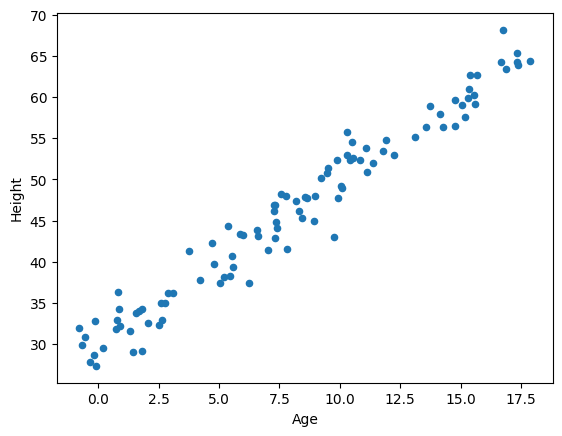

In [7]:
data.plot(x='Age',y='Height' ,kind='scatter')


In [8]:
def graph_plot(b0,b1):
  plt.scatter(data['Age'],data['Height'])
  plt.xlabel('Age')
  plt.ylabel('Height')
  # plt.plot(list(range(min(data['Age']).astype(int),max(data['Age']).astype(int))),[b0+b1*x for x in range(min(data['Age']).astype(int),max(data['Age']))])
  plt.plot(list(range(-1,20)),[b0+b1*x for x in range(-1,20)])
  plt.show()

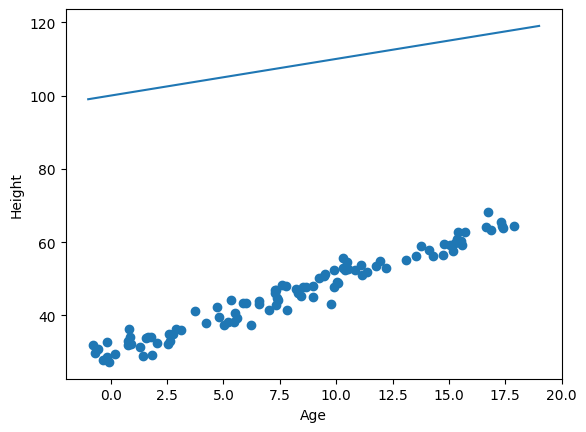

In [9]:
graph_plot(100,1)

In [10]:
def loss_function(b0,b1):
  total_loss=0
  for i in range(len(data)):
    x=data['Age'][i]
    y=data['Height'][i]
    y_cap=b0+b1*x
    loss=(y-y_cap)**2
    total_loss+=loss
    return total_loss/len(data)

In [11]:
loss_function(35,1)

0.9721191801102202

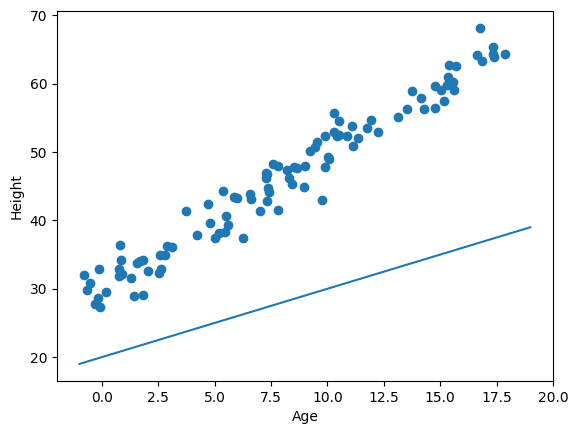

In [12]:
graph_plot(20,1)


In [13]:
loss_function(20,1)

6.18000231184345

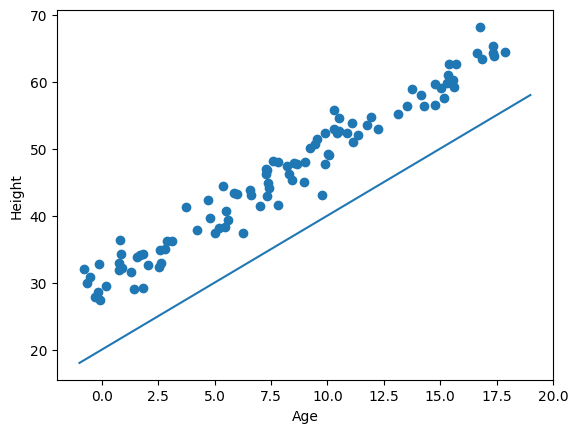

In [14]:
graph_plot(20,2)

In [15]:
loss_function(20,2)

1.0184314806357193

In [16]:
loss=[]

In [60]:
def gradient_descent(b0,b1,L=0.01):
  b0_gradient=0
  b1_gradient=0
  n=len(data)
  for i in range(n):
    x = data.loc[i].Age
    y = data.loc[i].Height
    y_cap=(b1 * x + b0)
    b1_gradient += (-(2/n)) * x * (y - y_cap)
    b0_gradient += (-(2/n)) * (y - y_cap)
  b0_new=b0-b0_gradient*L
  b1_new=b1-b1_gradient*L
  loss.append(loss_function(b0,b1))
  return b0_new,b1_new
# def gradient_descentnp(b0,b1,L=0.01):
#   x=data['Age'].to_numpy()
#   y=data['Height'].to_numpy()
#   y_cap=b0+b1*x
#   b1_gradient=np.sum((-(2/n))*x*(y-y_cap))
#   b0_gradient=np.sum(((-2/n))*(y-y_cap))
#   b1_new=b1-b1_gradient*L
#   b0_new=b0-b0_gradient*L
#   return b0_new,b1_new



Loss Function 35.554368786328524
loss_function 0.00021601524872830356


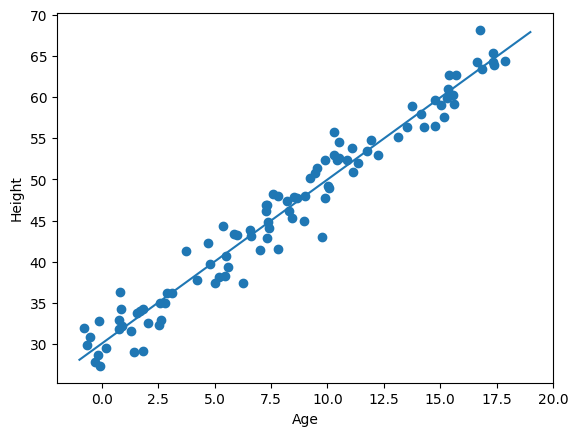

In [61]:
b0=0
b1=0
n= len(data)
print('Loss Function',loss_function(b0,b1))
loss.append(loss_function(b0,b1))
for i in range(1000):
  b0,b1=gradient_descent(b0,b1,0.01)
  if((i+1)%1000==0):
    print('loss_function',loss_function(b0,b1))
    graph_plot(b0,b1)
    plt.show()



In [19]:
x_new=122
pred=b0+b1*x_new
print(pred)

273.02456225111473


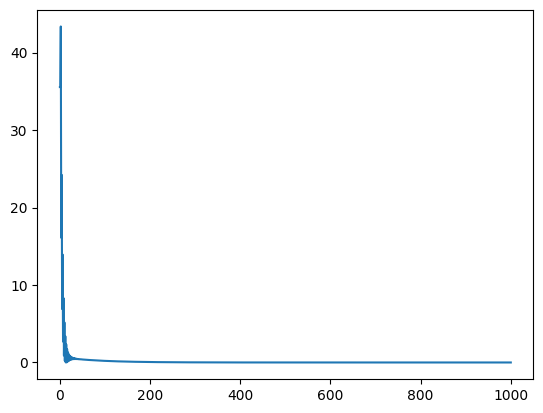

In [20]:
plt.plot(loss)

In [21]:
b0,b1

(30.07149081189676, 1.9914186183542455)

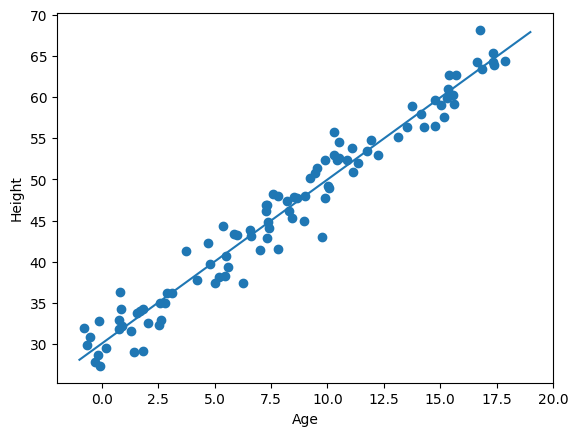

In [22]:
graph_plot(b0,b1)

Linear Regression Using Sklearn

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
data

,Unnamed: 0,Age,Height
0,0,14.767874,59.627484
1,1,3.107671,36.146453
2,2,7.266917,46.912878
3,3,1.815180,29.125660
4,4,16.753758,68.170414
...,...,...,...
95,95,7.323712,46.857505
96,96,5.591509,39.339990
97,97,2.625606,32.918925
98,98,5.519293,40.704154


In [25]:
Age=data['Age']
Age

0     14.767874
1      3.107671
2      7.266917
3      1.815180
4     16.753758
        ...    
95     7.323712
96     5.591509
97     2.625606
98     5.519293
99    13.117413
Name: Age, Length: 100, dtype: float64

In [26]:
x=data['Age'].to_numpy().reshape((-1,1))
x

array([[14.76787382],
       [ 3.10767135],
       [ 7.26691701],
       [ 1.81517968],
       [16.75375763],
       [ 5.35126307],
       [ 8.65571488],
       [ 4.20599293],
       [ 7.35669106],
       [ 1.66817819],
       [ 8.2969588 ],
       [14.74948482],
       [15.28545214],
       [-0.16353169],
       [16.65534197],
       [ 0.85918789],
       [ 8.43332999],
       [11.92386163],
       [ 0.76828323],
       [11.36202254],
       [-0.68301696],
       [ 1.29597926],
       [10.31206094],
       [17.39335272],
       [10.31003056],
       [-0.14639168],
       [ 6.23764582],
       [15.55153122],
       [ 2.77346425],
       [15.59798962],
       [-0.78085287],
       [ 7.57789784],
       [ 2.04165705],
       [ 9.90665221],
       [ 2.87252515],
       [ 1.54231936],
       [-0.08795844],
       [ 5.46202264],
       [15.04362695],
       [ 5.99372597],
       [ 4.805291  ],
       [ 8.94992003],
       [ 5.02020985],
       [ 9.89555258],
       [ 5.20281507],
       [ 0

In [27]:
y=data['Height']
y

0     59.627484
1     36.146453
2     46.912878
3     29.125660
4     68.170414
        ...    
95    46.857505
96    39.339990
97    32.918925
98    40.704154
99    55.177407
Name: Height, Length: 100, dtype: float64

In [28]:
reg=LinearRegression()

In [29]:
reg.fit(x,y)

LinearRegression()

In [30]:
reg.coef_

array([1.9855967])

In [31]:
reg.intercept_

30.138136682479868

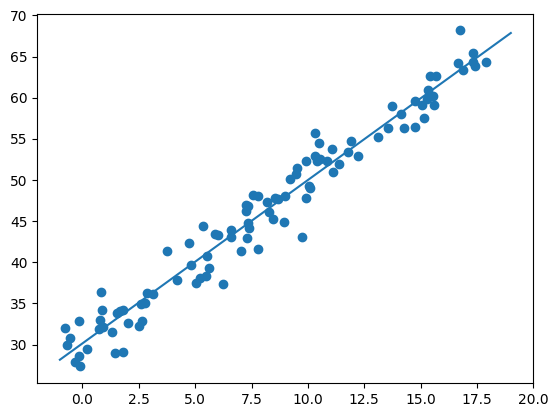

In [35]:
plt.scatter(x,y)
plt.plot(reg.coef_,reg.intercept_ ,color='Black', linewidth='2')
plt.plot(list(range(-1,20)),[reg.intercept_+reg.coef_*x for x in range(-1,20)])
plt.show()

In [38]:
loss_function(reg.intercept_,reg.coef_)

array([0.00027658])

In [40]:
x_new=15
y_new=reg.intercept_+reg.coef_*x_new
print(y_new)

[59.92208725]


Gradient Descent Using NUmpy

In [50]:
def gradient_descentnp(b0,b1,L=0.01):
  x=data['Age'].to_numpy()
  y=data['Height'].to_numpy()
  y_cap=b0+b1*x
  b1_gradient=(-(2/n)*x*(y-y_cap)**2)
  b0_gradient=((-2/n)*(y-y_cap))
  b1_new=b1-b1_gradient*L
  b0_new=b0-b0_gradient*L
  return b0_new,b1_new




Loss Function 35.554368786328524
loss_function 0.00021601524872830356


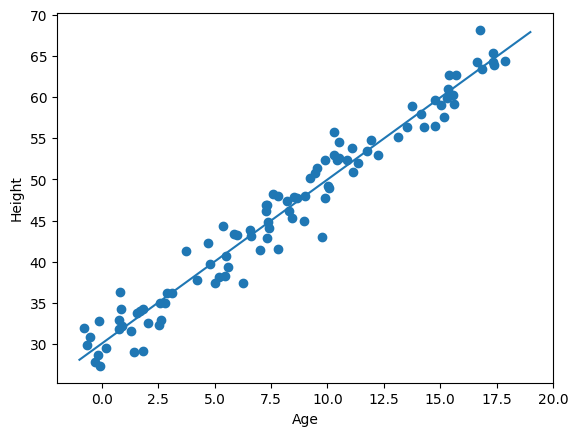

In [62]:
b0=0
b1=0
n= len(data)
print('Loss Function',loss_function(b0,b1))
loss.append(loss_function(b0,b1))
for i in range(1000):
  b0,b1=gradient_descentnp(b0,b1,0.01)
  if((i+1)%1000==0):
    print('loss_function',loss_function(b0,b1))
    graph_plot(b0,b1)
    plt.show()